In [1]:
%matplotlib inline

In [2]:
import pathlib
import collections
from typing import Mapping

import numpy
import matplotlib.pyplot as plt

In [3]:
articles = {}
words = collections.Counter()
for path in pathlib.Path('../../pages').glob('**/*.mdx'):
    with path.open() as f:
        article = f.read().replace('\n', '')
    words.update(article)
    articles[path] = collections.Counter(article)

wordlist = list(words.items())
wordlist.sort(key=lambda x: x[0])
wordlist.sort(key=lambda x: x[1])
wordlist = numpy.array(wordlist)

articlelist = [[v[w[0]] for w in wordlist] for k, v in articles.items()]
articlelist.sort(key=lambda x: sum(x))

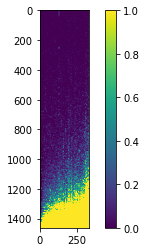

In [4]:
heatmap = numpy.array(articlelist).T

plt.imshow(heatmap, vmin=0, vmax=1)
plt.colorbar()

In [5]:
usage = heatmap.sum(axis=1)
thresholds = [
    numpy.percentile(usage, 75),
    numpy.percentile(usage, 50),
    numpy.percentile(usage, 25),
]

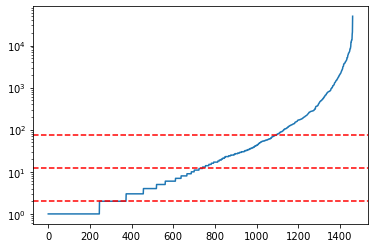

In [6]:
plt.plot(usage)
for t in thresholds:
    plt.axhline(t, ls='--', color='red')
plt.yscale('log')

In [7]:
[(usage >= t).sum() for t in thresholds]

[366, 738, 1216]

In [8]:
wordlist[usage >= thresholds[1], 0]

array(['ゲ', '万', '乱', '勿', '却', '去', '周', '命', '地', '挑', '攻', '料', '章',
       '運', '閉', '階', '離', '与', '候', '円', '各', '技', '提', '枚', '済', '突',
       '致', '談', '越', '透', '響', 'ぬ', 'ガ', '予', '仮', '伸', '勉', '固', '夏',
       '嬉', '御', '復', '念', '照', '覚', '諸', '逆', '世', '休', '半', '反', '告',
       '図', '埋', '怒', '横', '真', '術', '謎', '互', '低', '勝', '因', '壊', '故',
       '条', '殺', '経', '超', '黒', 'ひ', 'ヒ', '並', '倍', '原', '域', '局', '幅',
       '弱', '心', '戦', '景', '未', '格', '死', '求', '研', '究', '背', '領', '判',
       '影', '微', '積', '空', '緒', '雑', 'ふ', '会', '四', '工', '差', '干', '極',
       '監', '範', '若', '太', '既', '月', '系', '論', '降', '共', '測', '物', '補',
       '角', '途', '進', '遅', '項', '座', '昨', '替', '象', '依', '妙', '徴', '抜',
       '抽', '改', '況', '登', '精', '落', '評', '辺', '述', '選', '顔', '験', 'ゴ',
       '含', '困', '導', '拡', '放', '析', '止', '難', '非', 'ぇ', 'づ', 'ゆ', '三',
       '側', '制', '好', '悪', '稿', '端', '紹', '綺', '習', '較', '飛', '麗', 'ぜ',
       '均', '程', '答', '触', 'ぐ', '交', '介', '似', '向', '待', '戻', '描